In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('figure',figsize=(14,8))

In [3]:
colnames=['date', 'time', 'destination', 'user', 'cohort', 'ip']
df = pd.read_csv('curriculum-access.txt', sep=' ', header=None, 
               names=colnames)
df['datetime'] = df.date.astype(str) + ' ' + df.time.astype(str)
df.datetime = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df = df.drop(columns=['date','time'])

In [4]:
df.head(10)

,destination,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62
2018-01-26 09:56:48,javascript-i/functions,3,22.0,98.106.20.62
2018-01-26 09:56:59,javascript-i/loops,2,22.0,98.106.20.62


In [5]:
df.shape

(543596, 4)

In [6]:
# df[df.user.isin(df.user.value_counts().nlargest(10).index)]

In [7]:
df.user[df.user==531].resample('D').sum() / 531

datetime
2019-11-04    11.0
2019-11-05     9.0
2019-11-06    28.0
2019-11-07    24.0
2019-11-08    17.0
              ... 
2020-04-19     0.0
2020-04-20    17.0
2020-04-21     0.0
2020-04-22     0.0
2020-04-23     3.0
Freq: D, Name: user, Length: 172, dtype: float64

In [8]:
(df.user[df.user==531].resample('D').sum() / 531).index.max() - \
(df.user[df.user==531].resample('D').sum() / 531).index.min()

Timedelta('171 days 00:00:00')

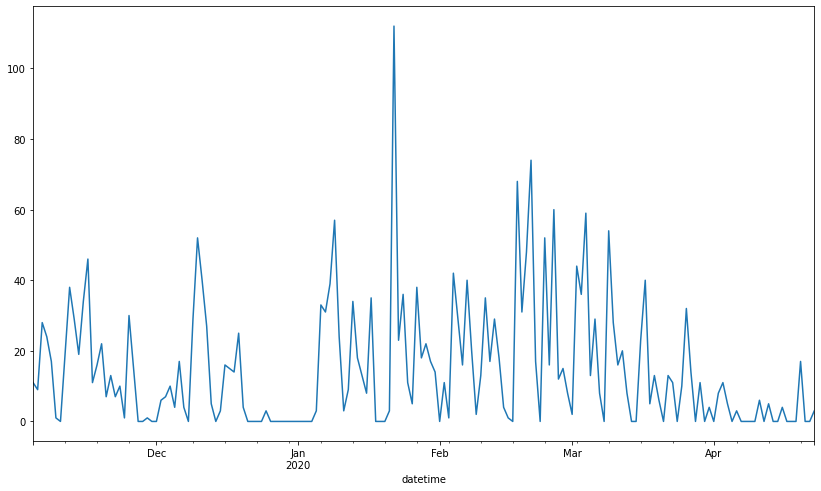

In [9]:
(df.user[df.user==531].resample('D').sum() / 531).plot()

In [10]:
def active_time_for_users(cohort):
    users = []
    people = []
    for person in df.user[df.cohort==cohort].unique():
            users.append((df.user[df.user==person].resample('D').sum()\
                / person).index.max() - \
            (df.user[df.user==person].resample('D').sum()\
                / person).index.min())
            people.append(person)
    info = pd.DataFrame({'user': people, 'time_active':users})
    return info

In [11]:
def who_are_outliers(cohort):
    info = active_time_for_users(cohort)
    return info[(info.time_active < info.time_active.median() / 1.5) | 
                (info.time_active > info.time_active.median() * 1.5)]

In [12]:
for cohort in [52,53,55,57]:
    info = who_are_outliers(cohort)
    print(info)

    user time_active
6    522     78 days
13   529      4 days
27    64    837 days
   user time_active
0   120    802 days
6   552     44 days
    user time_active
2    577     42 days
12   587     43 days
17   616     60 days
18   617     57 days
   user time_active
0   619      0 days


In [38]:
df[df.cohort.isna()].user.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64])

In [65]:
df[df.user.isin(df[df.cohort.isna()].user.unique())].cohort.unique()

array([nan,  1.,  7., 12., 11., 28., 31., 34., 52.])

In [63]:
for person in df[df.cohort.isna()].user.unique():
    if len(df[df.user==person].cohort.unique()) > 1:
        print(person)

88
358
375
64


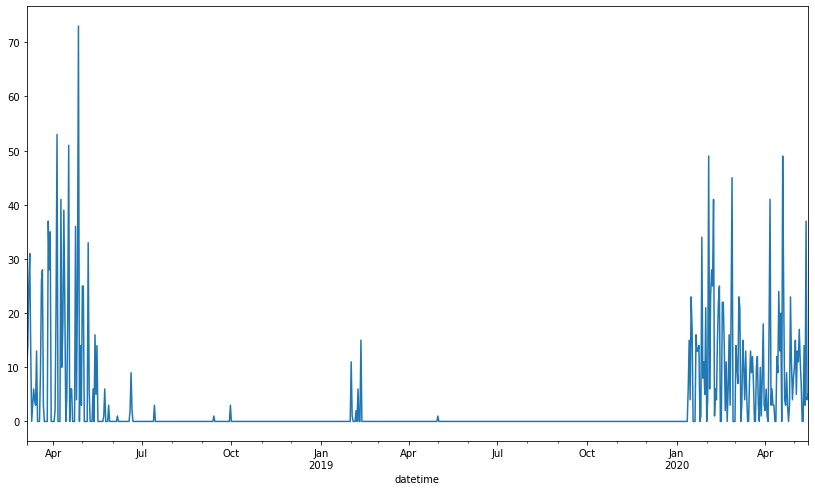

In [253]:
person = 120
(df.user[df.user==person].resample('D').sum() / person).plot()

In [109]:
# for cohort in sorted(df.cohort.unique()):
#     info = who_are_outliers(cohort)
#     if info.index != []:
#         info.time_active = info.time_active.dt.days
#         print(info)

In [112]:
info = who_are_outliers(55)
info

,user,time_active
2,577,42 days
12,587,43 days
17,616,60 days
18,617,57 days


In [243]:
temp = pd.DataFrame(columns = ['user','time_active', 'cohort'])
for cohort in [8,51,52,53,55, 1]:#sorted(df.cohort.unique()):
    info = who_are_outliers(cohort)
    if info.index != []:
        info.time_active = info.time_active.dt.days
        info['cohort'] = cohort
        temp = temp.append(info, sort=False)
temp.head(10)

,user,time_active,cohort
0,1,840,8
4,646,19,8
4,492,18,51
8,496,147,51
6,522,78,52
13,529,4,52
27,64,837,52
0,120,802,53
6,552,44,53
2,577,42,55


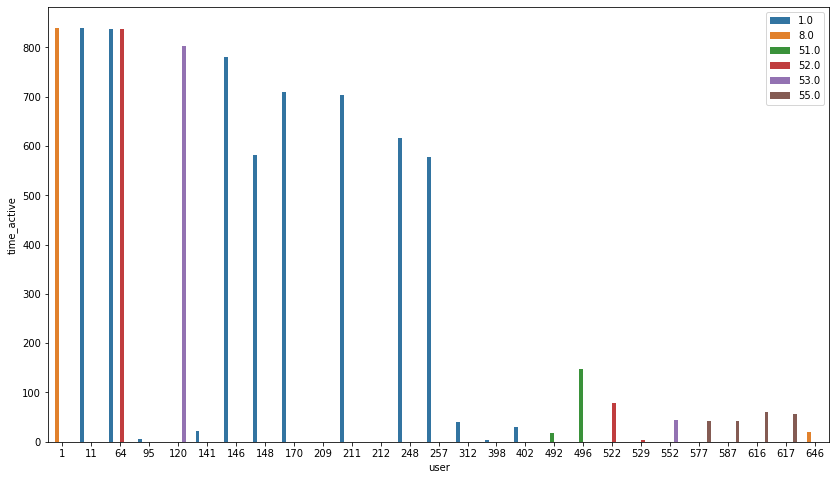

In [237]:
sns.barplot('user','time_active', data=temp, hue='cohort')
plt.legend()

In [326]:
temp = pd.DataFrame(columns = ['user','time_active'])
for cohort in sorted(df.cohort.unique()):
    info = who_are_outliers(cohort)
    if info.index != []:
        info.time_active = info.time_active.dt.days
        info['cohort'] = cohort
        temp = temp.append(info, sort=False) 

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.


In [247]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 20
Data columns (total 3 columns):
user           334 non-null object
time_active    334 non-null object
cohort         334 non-null object
dtypes: object(3)
memory usage: 10.4+ KB


In [327]:
temp

,user,time_active,cohort
0,11,840,1.0
2,64,837,1.0
3,95,6,1.0
4,141,22,1.0
5,146,781,1.0
...,...,...,...
0,594,14,56.0
3,597,18,56.0
7,601,53,56.0
13,607,9,56.0


Text(0, 0.5, 'Days Active')

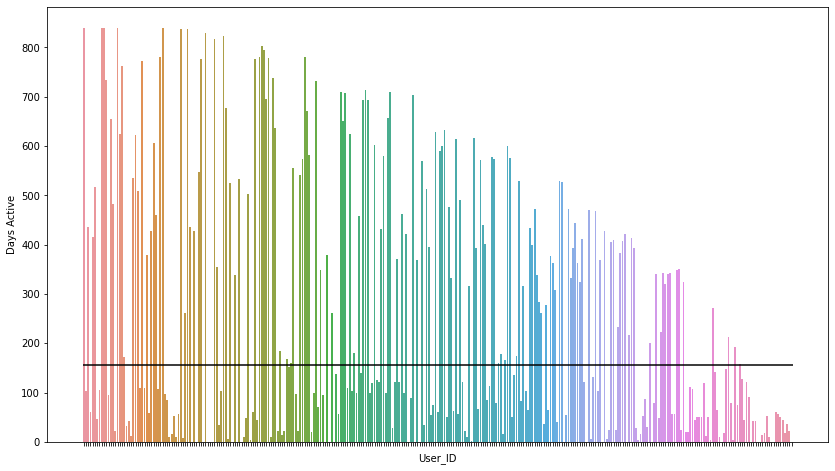

In [329]:
sns.barplot('user','time_active', data=temp, ).set(xticklabels=[])
# temp.plot.bar('user', 'time_active', )
# plt.bar('user', 'time_active', data=temp, label='cohort',)
left, right = plt.xlim()
plt.hlines(155, left, right)
plt.xlabel('User_ID')
plt.ylabel('Days Active')

In [335]:
df.head()

,destination,user,cohort,ip,course
datetime,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,Unknown
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,Web Dev
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,Web Dev
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,Unknown
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,Web Dev


In [351]:
times = []
for cohort in sorted(df.cohort.unique()):
    times.append(active_time_for_users(cohort).mean()[1])
times

[Timedelta('343 days 18:40:00'),
 Timedelta('95 days 08:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('41 days 00:00:00'),
 Timedelta('151 days 20:00:00'),
 Timedelta('171 days 19:12:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('226 days 19:12:00'),
 Timedelta('440 days 06:00:00'),
 Timedelta('386 days 12:00:00'),
 Timedelta('299 days 22:00:00'),
 Timedelta('184 days 00:00:00'),
 Timedelta('153 days 18:00:00'),
 Timedelta('237 days 20:18:27.692307'),
 Timedelta('247 days 05:08:34.285714'),
 Timedelta('278 days 01:24:42.352941'),
 Timedelta('293 days 14:34:17.142857'),
 Timedelta('293 days 19:53:08.571428'),
 nan,
 Timedelta('0 days 00:00:00'),
 Timedelta('376 days 13:49:05.454545'),
 Timedelta('311 days 09:10:35.294117'),
 Timedelta('298 days 12:00:00'),
 Timedelta('354 days 20:24:00'),
 Timedelta('213 days 13:42:51.428571'),
 Timedelta('410 days 10:40:00'),
 Timedelta('243 days 10:33:36'),
 Timedelta('199 days 05:08:34.285714'),
 Timedelta('190 days 16:00:00'),
 Timedelta('195

In [350]:
times = pd.DataFrame(times, index=sorted(df.cohort.unique())).reset_index()
times

,level_0,index,0
0,1.0,2.0,95 days 08:00:00
1,2.0,4.0,0 days 00:00:00
2,4.0,7.0,151 days 20:00:00
3,6.0,9.0,0 days 00:00:00
4,7.0,11.0,226 days 19:12:00
5,8.0,12.0,440 days 06:00:00
6,9.0,13.0,386 days 12:00:00
7,11.0,15.0,184 days 00:00:00
8,12.0,16.0,153 days 18:00:00
9,13.0,17.0,237 days 20:18:27.692307


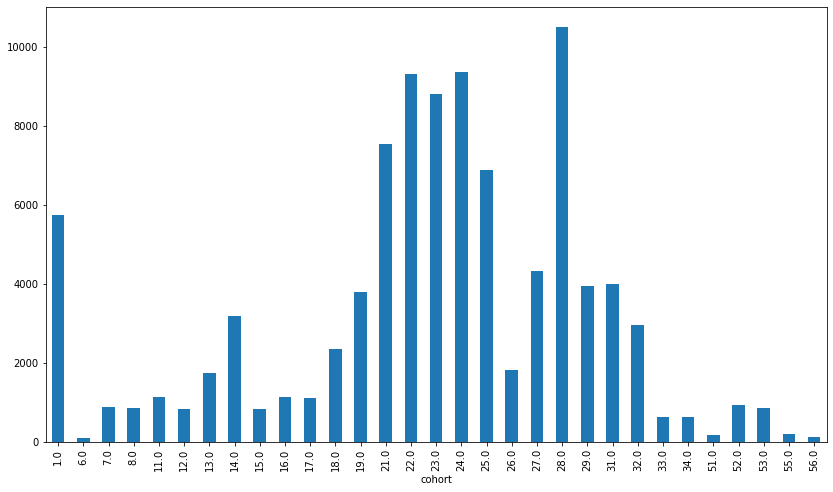

In [331]:
temp.groupby('cohort').time_active.sum().sort_index().plot.bar()

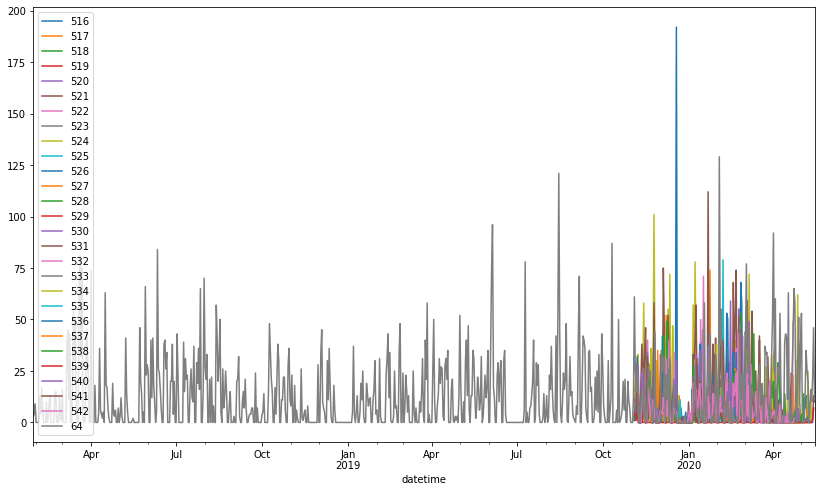

In [252]:
for person in df.user[df.cohort==52].unique():
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

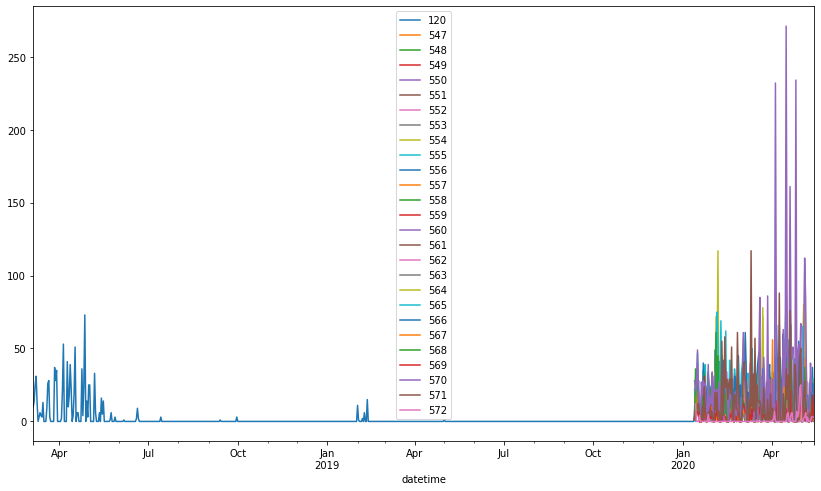

In [24]:
for person in df.user[df.cohort==53].unique():
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

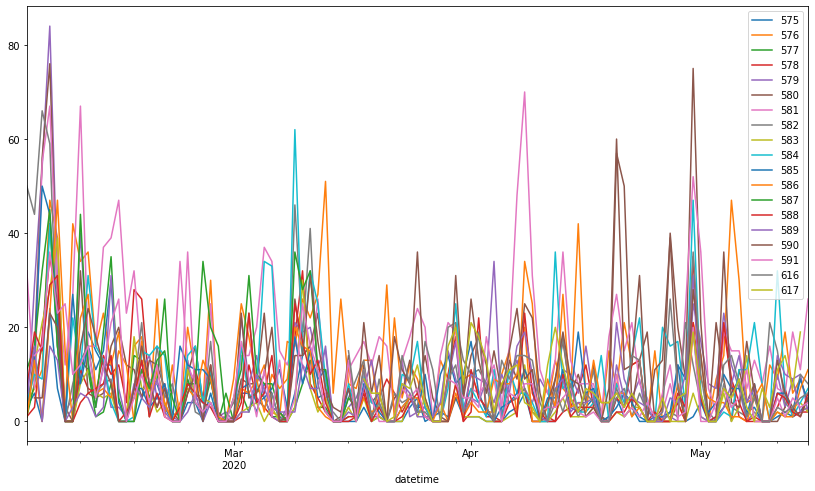

In [25]:
for person in df.user[df.cohort==55].unique():
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

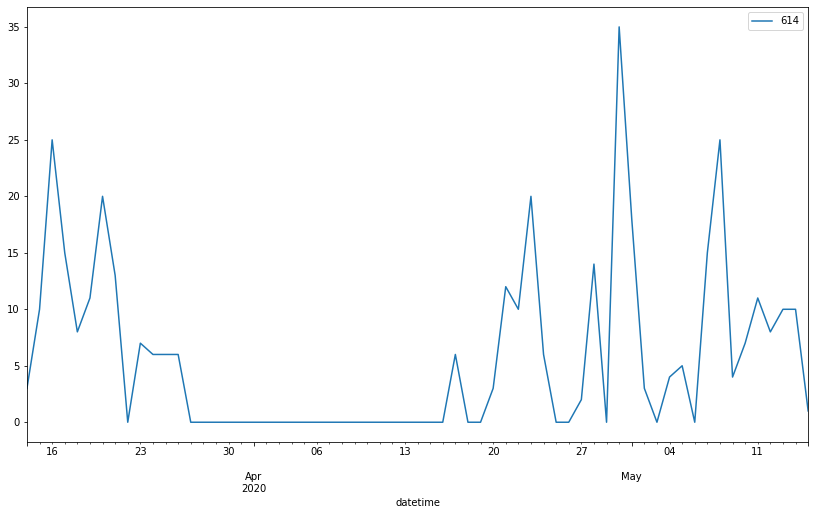

In [22]:
for person in df.user[df.cohort==56].unique():
    if person == 614:
        (df.user[df.user==person].resample('D').sum()\
            / person).plot(label=person)
plt.legend()

In [254]:
df

,destination,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...
2020-05-15 15:01:40,java-ii/file-io,602,56.0,48.188.241.68
2020-05-15 15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
2020-05-15 15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [259]:
df.destination.isna().sum()
df.destination = df.destination.fillna('Null')

In [260]:
def get_topic(destination):
    ds_list = ["python", "time series", "nlp"]
    web_dev = ["javascript", "java", "css"]
    for ds in ds_list:
        if ds in destination:
            return "Data Science"
    for wd in web_dev:
        if wd in destination:
            return "Web Dev"
    return "Unknown"
df["course"] = df.destination.apply(get_topic)

In [262]:
df.course.value_counts()

Unknown         269983
Web Dev         266456
Data Science      7157
Name: course, dtype: int64

In [268]:
train = df.user.resample('D').sum()
train

datetime
2018-01-26     12191
2018-01-27      6598
2018-01-28      3499
2018-01-29     21923
2018-01-30     18825
               ...  
2020-05-11    594543
2020-05-12    474915
2020-05-13    642579
2020-05-14    484095
2020-05-15    388848
Freq: D, Name: user, Length: 841, dtype: int64

In [264]:
# df is a dataframe with datetime as index and measure as the value. 
span = 24
ema = df.ewm(span=span, adjust=False).mean()
stdev = df.ewm(span=span, adjust=False).std()
# We want the following values to all be associated with the following 
#     target date/value, so we will compute them and then change to 
#     index to represent the following time period, essentially 
#     shifting each value down one (or forward in terms of date). 
#     Basically, we will be comparing the value of one day to the 
#     ema computed through the previous day (and the ub and lb 
#     computed from that ema)...that way we are not using our the 
#     value from our target date in the computation of the EMA we 
#     will compare that value to. 
ema

,user,cohort
datetime,,
2018-01-26 09:55:03,1.000000,8.000000
2018-01-26 09:56:02,1.000000,8.000000
2018-01-26 09:56:05,1.000000,8.000000
2018-01-26 09:56:06,1.000000,8.000000
2018-01-26 09:56:24,1.080000,9.120000
...,...,...
2020-05-15 15:01:40,409.418885,48.187364
2020-05-15 15:01:54,423.225375,48.732375
2020-05-15 15:03:37,440.327345,49.393785


In [315]:
# ema = pd.DataFrame({'ema': ema})
# stdev = pd.DataFrame({'stdev': stdev})
# previous_val = pd.DataFrame({'previous_val': df})
# prev_day_df = stdev.join(ema, how='left')
# prev_day_df = prev_day_df.join(previous_val, how='left')
# prev_day_df.fillna(0, inplace = True)
# my_index = df.index[1:]
# prev_day_df = prev_day_df[:-1].reset_index().set_index(my_index)\
#                                 .drop(columns = ['index'])
# target_val = pd.DataFrame({'target_val': df})
# df = target_val.join(prev_day_df, how='left')
# df.fillna(0, inplace = True)
# # compute the upper and lower band
# df['ub'] = df['ema'] + 3*df['stdev']
# df['lb'] = df['ema'] - 3*df['stdev']
# # compute percent b
# df['pct_b'] = (df['target_val'] - df['lb']) / (df['ub'] - df['lb'])

In [ ]:
# Exercise
# Ideas:
# Use DBSCAN to detect anomalies in curriculumn access.
# Use DBSCAN to detect anomalies in other products from the customers 
#     dataset.
# Use DBSCAN to detect anomalies in number of bedrooms and finished 
#     square feet of property for the filtered dataset you used in the 
#     clustering project (single unit properties with a logerror).

In [270]:
df.course.value_counts()

Unknown         269983
Web Dev         266456
Data Science      7157
Name: course, dtype: int64

In [280]:
knowns = df.copy()

In [288]:
knowns = knowns[knowns.course.isin(['Web Dev', 'Data Science'])]
knowns.head()

,destination,user,cohort,ip,course
datetime,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,Web Dev
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,Web Dev
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,Web Dev
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62,Web Dev
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62,Web Dev


In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import MinMaxScaler

In [317]:
pd.to_datetime('2020-07-07') - pd.to_datetime('2020-02-03')

Timedelta('155 days 00:00:00')